# Calcular el precio de una laptop dadas sus características (Problema de Regresión)

> PASO 1 - Adquirir los datos de las ventas de Laptops de Amazon

In [365]:
import pandas as pd

laptops = pd.read_csv("datasets/amazon_laptop_prices.csv")

# laptops = laptops[ ((laptops["cpu"] == "Intel Core i7") | (laptops["cpu"] == "Core i7")) & (laptops["brand"] == "HP") ]

laptops = laptops[ (laptops["brand"] == "Apple") ]

laptops.head(5)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"
6,Apple,MacBook Pro,13.3 Inches,Space Gray,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.7,$965.08
84,Apple,MacBook Pro,16.2 Inches,Space Gray,512 GB,ARM 7100,32 GB,macOS 12 Monterey,NaN,Integrated,M1 Pro,NaN,4.7,"$1,899.00"
86,Apple,"2022 Apple MacBook Air M2, 16GB RAM, 512GB Sto...",13.6 Inches,NaN,512 GB,Apple M1,16 GB,macOS 12 Monterey,Fingerprint Reader,Integrated,Apple Integrated Graphics,NaN,4.8,"$1,459.94"


In [366]:
laptops["cpu"].unique()

array(['Unknown', 'ARM 7100', 'Apple M1', 'Others', nan, 'Apple M2 Max',
       'Core i9 7960X', 'Apple M2', 'Intel Core i3', 'Core i5',
       'Core i7 Family'], dtype=object)

In [367]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 3 to 3153
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 29 non-null     object 
 1   model                 19 non-null     object 
 2   screen_size           24 non-null     object 
 3   color                 14 non-null     object 
 4   harddisk              27 non-null     object 
 5   cpu                   20 non-null     object 
 6   ram                   28 non-null     object 
 7   OS                    29 non-null     object 
 8   special_features      7 non-null      object 
 9   graphics              29 non-null     object 
 10  graphics_coprocessor  7 non-null      object 
 11  cpu_speed             9 non-null      object 
 12  rating                20 non-null     float64
 13  price                 29 non-null     object 
dtypes: float64(1), object(13)
memory usage: 3.4+ KB


In [368]:
100 - 100 * laptops["harddisk"].count() / len(laptops)

6.896551724137936

In [369]:
100 - 100 * laptops["screen_size"].count() / len(laptops)

17.241379310344826

In [370]:
100 - 100 * laptops["price"].count() / len(laptops)

0.0

In [371]:
100 - 100 * laptops["ram"].count() / len(laptops)

3.448275862068968

In [372]:
100 - 100 * laptops["rating"].count() / len(laptops)

31.034482758620683

> PASO 2 - Selección de características

En un problema de regresión debemos considerar que las características sean valores continuos en su mayoría para que tenga sentido la regresión, es decir, el modelo busca generar una variable continua a partir de la combinación de otras variables continuas, por lo que debemos evitar valores categóricos o valores que puedan afectar el modelo continuo.

In [373]:
features = ["screen_size", "harddisk", "ram", "rating"]

In [374]:
laptops[ features ].sample(10)

,screen_size,harddisk,ram,rating
2796,NaN,2 TB,32 GB,NaN
350,13 Inches,NaN,8 GB,4.8
511,NaN,1 TB,64 GB,NaN
373,NaN,4 TB,96 GB,NaN
1922,12 Inches,512 GB,8 GB,4.0
4,15.3 Inches,256 GB,8 GB,4.8
6,13.3 Inches,256 GB,8 GB,4.7
95,13 Inches,256 GB,16 GB,4.7
3153,13 Inches,128 GB,8 GB,4.4
2450,16.2 Inches,4 TB,64 GB,NaN


> PASO 3 - Limpieza de datos (normalizar las características)

In [375]:
texto = "16.66 Inches"

# Regular Expressions (Expresiones Regulares)
import re

# Pattern: \d+\.?\d*
match = re.match(r"[0-9]+\.?[0-9]*", texto)

valor = None

if not match == None:
    valor = float(match.group(0))
    
valor

16.66

In [376]:
def clean_screen_size(screen_size):
    if f"{screen_size}" == "nan":
        return None
    
    # Regular Expressions (Expresiones Regulares)
    import re
    
    # Pattern: \d+\.?\d*
    match = re.match(r"[0-9]+\.?[0-9]*", screen_size)
    
    valor = None
    
    if not match == None:
        valor = float(match.group(0))
        
    return valor

laptops["screen_size"] = laptops["screen_size"].map(clean_screen_size)

In [377]:
laptops[ features ].sample(10)

,screen_size,harddisk,ram,rating
264,13.3,NaN,16 GB,4.7
930,13.0,512 GB,16 GB,1.0
774,16.0,1 TB,16 GB,4.7
511,NaN,1 TB,64 GB,NaN
995,13.3,256 GB,16 GB,3.9
2112,13.3,128 GB,8 GB,4.5
383,16.2,2 TB,64 GB,NaN
3140,15.4,256 GB,NaN,4.0
350,13.0,NaN,8 GB,4.8
397,13.6,1 TB,16 GB,NaN


In [378]:
laptops["screen_size"].min()

12.0

In [379]:
laptops["screen_size"].max()

16.2

In [380]:
laptops["screen_size"].mean()

14.154166666666667

In [381]:
laptops["screen_size"].std()

1.3516428543802173

In [382]:
import numpy as np

np.random.normal(laptops["screen_size"].mean(), laptops["screen_size"].std(), 5)

array([12.99757249, 15.92268698, 13.7159407 , 17.31435056, 11.86927474])

In [383]:
laptops["screen_size"].unique()

array([13.3, 15.3, 16.2, 13.6, 13. , 16. ,  nan, 12. , 14. , 15.4])

In [384]:
laptops.groupby("screen_size")["screen_size"].agg("count")

screen_size
12.0    1
13.0    4
13.3    6
13.6    4
14.0    1
15.3    1
15.4    1
16.0    2
16.2    4
Name: screen_size, dtype: int64

In [385]:
pool = []

for screen_size, repeats in laptops.groupby("screen_size")["screen_size"].agg("count").items():
    pool.extend([screen_size] * repeats)
    
pool

[12.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.3,
 13.3,
 13.3,
 13.3,
 13.3,
 13.3,
 13.6,
 13.6,
 13.6,
 13.6,
 14.0,
 15.3,
 15.4,
 16.0,
 16.0,
 16.2,
 16.2,
 16.2,
 16.2]

In [386]:
import random

random.choice(pool)

13.0

In [387]:
laptops["screen_size"].dropna().sample(10)

1017    16.2
3       13.3
2450    16.2
95      13.0
111     13.6
3153    13.0
930     13.0
624     13.6
84      16.2
2153    14.0
Name: screen_size, dtype: float64

In [388]:
random.choice(list(laptops["screen_size"].dropna()))

13.0

In [389]:
def fix_screen_size(screen_size):
    if f"{screen_size}" == "nan":
        return random.choice(list(laptops["screen_size"].dropna()))
    return screen_size

# Al reparar los datos faltantes del tamaño de pantalla
# supusimos que podía ser sustituido por algún tamaño aleatorio
# bajo la misma probabilidad (* Hipótesis 1)
laptops["screen_size"] = laptops["screen_size"].map(fix_screen_size)

laptops[ features ]

,screen_size,harddisk,ram,rating
3,13.3,256 GB,8 GB,4.8
4,15.3,256 GB,8 GB,4.8
6,13.3,256 GB,8 GB,4.7
84,16.2,512 GB,32 GB,4.7
86,13.6,512 GB,16 GB,4.8
95,13.0,256 GB,16 GB,4.7
111,13.6,256 GB,16 GB,5.0
150,16.0,1 TB,32 GB,3.0
264,13.3,NaN,16 GB,4.7
345,13.3,256 GB,8 GB,4.0


In [390]:
laptops.groupby("harddisk")["harddisk"].agg("count")

harddisk
1 TB      6
128 GB    2
2 TB      2
256 GB    8
4 TB      2
512 GB    7
Name: harddisk, dtype: int64

In [391]:
def clean_harddisk(harddisk):
    if f"{harddisk}" == "nan":
        return None
    import re
    if not re.search(r"MB", harddisk) == None:
        match = re.search(r"\d+.?\d*", harddisk)
        if not match == None:
            valor = float(match.group(0))
            return valor / 1000
    elif not re.search(r"GB", harddisk) == None:
        match = re.search(r"\d+.?\d*", harddisk)
        if not match == None:
            valor = float(match.group(0))
            return valor
    elif not re.search(r"TB", harddisk) == None:
        match = re.search(r"\d+.?\d*", harddisk)
        if not match == None:
            valor = float(match.group(0))
            return valor * 1000
    return None

laptops["harddisk"] = laptops["harddisk"].map(clean_harddisk)

laptops[ features ].sample(10)

,screen_size,harddisk,ram,rating
383,16.2,2000.0,64 GB,NaN
1017,16.2,1000.0,32 GB,NaN
373,16.2,4000.0,96 GB,NaN
774,16.0,1000.0,16 GB,4.7
3153,13.0,128.0,8 GB,4.4
995,13.3,256.0,16 GB,3.9
111,13.6,256.0,16 GB,5.0
2796,16.0,2000.0,32 GB,NaN
3140,15.4,256.0,NaN,4.0
345,13.3,256.0,8 GB,4.0


In [392]:
random.choice(list(laptops["harddisk"].dropna()))

128.0

In [393]:
def fix_harddisk(harddisk):
    import random
    if f"{harddisk}" == "nan":
        return random.choice(list(laptops["harddisk"].dropna()))
    return harddisk

laptops["harddisk"] = laptops["harddisk"].map(fix_harddisk)

laptops[ features ].sample(10)

,screen_size,harddisk,ram,rating
264,13.3,256.0,16 GB,4.7
383,16.2,2000.0,64 GB,NaN
995,13.3,256.0,16 GB,3.9
2112,13.3,128.0,8 GB,4.5
397,13.6,1000.0,16 GB,NaN
511,15.4,1000.0,64 GB,NaN
1922,12.0,512.0,8 GB,4.0
1010,16.0,512.0,24 GB,NaN
1727,15.3,512.0,24 GB,5.0
95,13.0,256.0,16 GB,4.7


In [394]:
def clean_ram(ram):
    if f"{ram}" == "nan":
        return None
    import re
    if not re.search(r"MB", ram) == None:
        match = re.search(r"\d+.?\d*", ram)
        if not match == None:
            valor = float(match.group(0))
            return valor / 1000
    elif not re.search(r"GB", ram) == None:
        match = re.search(r"\d+.?\d*", ram)
        if not match == None:
            valor = float(match.group(0))
            return valor
    elif not re.search(r"TB", ram) == None:
        match = re.search(r"\d+.?\d*", ram)
        if not match == None:
            valor = float(match.group(0))
            return valor * 1000
    return None

laptops["ram"] = laptops["ram"].map(clean_ram)

laptops[ features ].sample(10)

,screen_size,harddisk,ram,rating
150,16.0,1000.0,32.0,3.0
1727,15.3,512.0,24.0,5.0
511,15.4,1000.0,64.0,NaN
264,13.3,256.0,16.0,4.7
4,15.3,256.0,8.0,4.8
1010,16.0,512.0,24.0,NaN
95,13.0,256.0,16.0,4.7
1017,16.2,1000.0,32.0,NaN
84,16.2,512.0,32.0,4.7
345,13.3,256.0,8.0,4.0


In [395]:
def fix_ram(ram):
    import random
    if f"{ram}" == "nan":
        return random.choice(list(laptops["ram"].dropna()))
    return ram

laptops["ram"] = laptops["ram"].map(fix_ram)

laptops[ features ].sample(10)

,screen_size,harddisk,ram,rating
930,13.0,512.0,16.0,1.0
3140,15.4,256.0,32.0,4.0
84,16.2,512.0,32.0,4.7
345,13.3,256.0,8.0,4.0
86,13.6,512.0,16.0,4.8
3153,13.0,128.0,8.0,4.4
2112,13.3,128.0,8.0,4.5
6,13.3,256.0,8.0,4.7
373,16.2,4000.0,96.0,NaN
3,13.3,256.0,8.0,4.8


In [396]:
def fix_rating(rating):
    import random
    if f"{rating}" == "nan":
        return random.choice(list(laptops["rating"].dropna()))
    return rating

laptops["rating"] = laptops["rating"].map(fix_rating)

laptops[ features ].sample(10)

,screen_size,harddisk,ram,rating
930,13.0,512.0,16.0,1.0
4,15.3,256.0,8.0,4.8
383,16.2,2000.0,64.0,4.5
511,15.4,1000.0,64.0,4.5
345,13.3,256.0,8.0,4.0
397,13.6,1000.0,16.0,4.5
95,13.0,256.0,16.0,4.7
2796,16.0,2000.0,32.0,4.0
1010,16.0,512.0,24.0,5.0
86,13.6,512.0,16.0,4.8


In [397]:
X = laptops[ features ].values

X.shape

(29, 4)

In [398]:
laptops["price"].sample(10)

511     $3,699.00 
95      $1,457.99 
350     $1,178.00 
150     $3,059.00 
373     $5,299.00 
6         $965.08 
3140    $1,649.95 
3153    $1,248.00 
2450    $4,888.99 
1010    $1,899.00 
Name: price, dtype: object

In [399]:
def clean_price(price):
    if f"{price}" == "nan":
        return None
    return float(price.replace("$", "").replace(",", ""))

laptops["price"] = laptops["price"].map(clean_price)

laptops["price"].sample(10)

111     1255.94
2112     689.95
1010    1899.00
84      1899.00
2796    3699.00
1922     779.95
150     3059.00
3153    1248.00
86      1459.94
1017    3043.95
Name: price, dtype: float64

In [400]:
columns = ["price"]
columns.extend(features)

laptops_analysis = laptops[ columns ].dropna()

laptops_analysis.sample(10)

,price,screen_size,harddisk,ram,rating
3140,1649.95,15.4,256.0,32.0,4.0
345,1068.99,13.3,256.0,8.0,4.0
774,1419.00,16.0,1000.0,16.0,4.7
2796,3699.00,16.0,2000.0,32.0,4.0
995,1499.00,13.3,256.0,16.0,3.9
264,911.00,13.3,256.0,16.0,4.7
111,1255.94,13.6,256.0,16.0,5.0
2112,689.95,13.3,128.0,8.0,4.5
2153,2611.35,14.0,1000.0,32.0,4.5
397,2778.00,13.6,1000.0,16.0,4.5


In [401]:
X = laptops_analysis[ features ].values
y = laptops_analysis["price"].values

X.shape, y.shape

((29, 4), (29,))

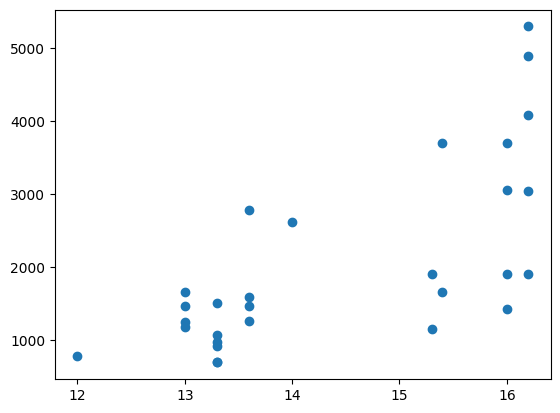

In [402]:
import matplotlib.pyplot as plt

plt.plot(X[:,0], y, "o")
plt.show()

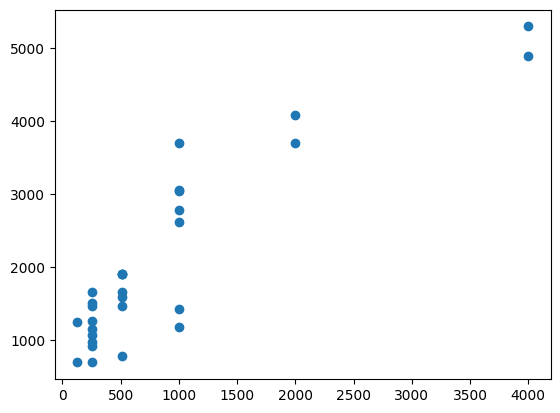

In [403]:
import matplotlib.pyplot as plt

plt.plot(X[:,1], y, "o")
plt.show()

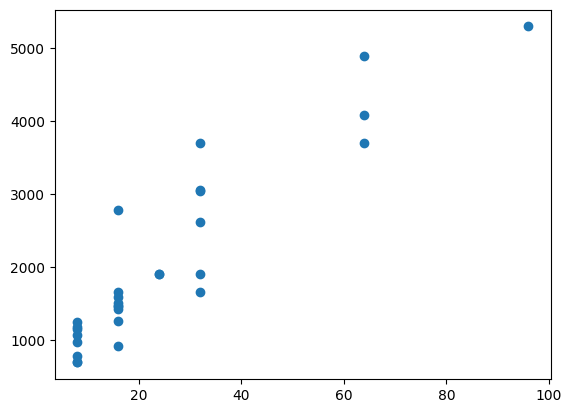

In [404]:
import matplotlib.pyplot as plt

plt.plot(X[:,2], y, "o")
plt.show()

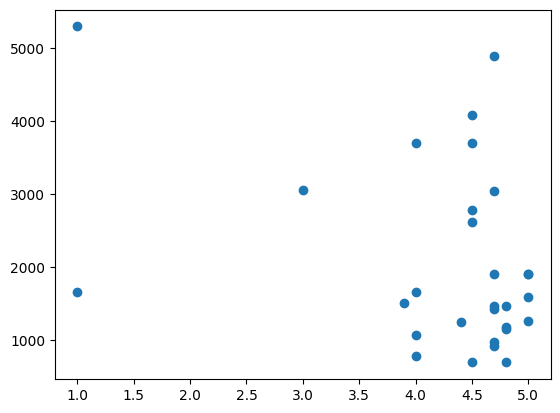

In [405]:
import matplotlib.pyplot as plt

plt.plot(X[:,3], y, "o")
plt.show()

In [406]:
X1 = laptops_analysis[ ["screen_size", "harddisk"] ].values

In [426]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X1, y)

reg.score(X1, y)

0.8474334167155714

In [442]:
reg.predict([
    [15.3, 512],
    [15.3, 256],
    [13.3, 256],
    [13.6, 512],
])

array([1955.92020184, 1719.93963614, 1186.58670944, 1502.57021414])

In [432]:
laptops_analysis["screen_size"].unique()

array([13.3, 15.3, 16.2, 13.6, 13. , 16. , 15.4, 12. , 14. ])

In [434]:
laptops_analysis["harddisk"].unique()

array([ 256.,  512., 1000., 4000., 2000.,  128.])

In [443]:
laptops_analysis[ (laptops_analysis["screen_size"] == 13.6) & (laptops_analysis["harddisk"] == 512) ].sample()

,price,screen_size,harddisk,ram,rating
86,1459.94,13.6,512.0,16.0,4.8


In [410]:
laptops_analysis[ (laptops_analysis["screen_size"] == 14.0) & (laptops_analysis["harddisk"] == 1000) ]["price"].mean()

2611.35

In [411]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, X, y, scoring="r2")

scores.mean()

0.6622159937907532

In [412]:
from sklearn.svm import SVR

reg = SVR()

reg.fit(X1, y)

reg.score(X1, y)

-0.13539979099066635

In [413]:
reg.predict([
    [15.6, 1000],
    [14.0, 1000],
])

array([1591.87851493, 1591.87847543])

In [414]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

Xp = pca.fit_transform(X)

Xp

array([[-6.11249273e+02, -6.39400727e+00],
       [-6.11247728e+02, -6.30333272e+00],
       [-6.11249235e+02, -6.39278042e+00],
       [-3.54856230e+02,  1.30908428e+01],
       [-3.55146552e+02, -3.00799760e+00],
       [-6.11105329e+02,  1.58348672e+00],
       [-6.11104977e+02,  1.60700854e+00],
       [ 1.33064854e+02,  4.30059899e+00],
       [-6.11105097e+02,  1.59708790e+00],
       [-6.11248975e+02, -6.38419247e+00],
       [ 1.32629453e+02, -1.98271011e+01],
       [ 3.13373078e+03,  1.41422926e+01],
       [ 1.13347831e+03,  1.82137845e+01],
       [ 1.32774166e+02, -1.18063499e+01],
       [ 1.33640385e+02,  3.62144672e+01],
       [-3.55146626e+02, -3.01045130e+00],
       [ 1.32775946e+02, -1.16999941e+01],
       [-3.55145602e+02, -2.98857966e+00],
       [-6.11104800e+02,  1.60690270e+00],
       [-3.55000634e+02,  5.08822648e+00],
       [ 1.33064376e+02,  4.28881000e+00],
       [-3.55001175e+02,  5.05649039e+00],
       [-3.55291628e+02, -1.10605908e+01],
       [-7.

In [415]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(Xp, y)

reg.score(Xp, y)

0.8923422969055973

In [416]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor()

reg.fit(X1, y)

reg.score(X1, y)

/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3878354734871994

In [417]:
def quarter(yi):
    if yi <= np.quantile(y, 0.25):
        return 1
    elif yi <= np.quantile(y, 0.50):
        return 2
    elif yi <= np.quantile(y, 0.75):
        return 3
    else:
        return 4

yp = pd.Series(y).map(quarter).values

yp

array([1, 1, 1, 3, 2, 2, 2, 4, 1, 1, 1, 4, 4, 3, 4, 2, 2, 3, 2, 3, 4, 3,
       1, 1, 3, 4, 4, 3, 2])

In [418]:
y

array([ 689.99, 1144.48,  965.08, 1899.  , 1459.94, 1457.99, 1255.94,
       3059.  ,  911.  , 1068.99, 1178.  , 5299.  , 4079.99, 2778.  ,
       3699.  , 1588.42, 1419.  , 1657.99, 1499.  , 1899.  , 3043.95,
       1899.  ,  779.95,  689.95, 2611.35, 4888.99, 3699.  , 1649.95,
       1248.  ])

In [419]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(X1, yp)

clf.score(X1, yp)

0.4482758620689655

In [420]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

clf.fit(X1, yp)

clf.score(X1, yp)

0.27586206896551724

In [421]:
def decile(yi):
    i = 1
    for d in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        if yi <= np.quantile(y, d):
            return i
        i += 1
    return 10

ypp = pd.Series(y).map(quarter).values

ypp

array([1, 1, 1, 3, 2, 2, 2, 4, 1, 1, 1, 4, 4, 3, 4, 2, 2, 3, 2, 3, 4, 3,
       1, 1, 3, 4, 4, 3, 2])

In [422]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(X1, ypp)

clf.score(X1, ypp)

0.4482758620689655

In [423]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

clf.fit(X1, ypp)

clf.score(X1, ypp)

0.3103448275862069